In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv(r"C:\Data Sets\preprocessd_data_cleaned.csv")

In [3]:
df

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,weekly_max_night_mins,videos_watched,customer_support_calls,churn
0,0,-0.264643,-0.946659,0,0,-1.508785,0.722258,-0.944404,-1.403000,-0.415473,0
1,0,0.029654,1.235009,0,0,0.304821,-0.901748,-0.688523,-0.599124,0.347522,0
2,0,2.580235,0.658246,0,0,-2.266627,0.613991,-0.483818,-1.403000,2.636507,1
3,0,-1.441834,0.783629,0,1,0.638123,-0.252146,0.079121,-0.197185,1.110517,0
4,0,0.127754,2.288228,0,0,-0.333851,0.253101,-0.893228,1.008630,-0.415473,0
...,...,...,...,...,...,...,...,...,...,...,...
3401,1,-0.805656,0.479710,0,0,0.887802,0.552184,0.865765,-0.495634,-0.415473,1
3402,0,0.477826,0.674425,0,0,2.038061,-0.931071,0.567257,2.100185,0.235227,1
3403,0,-0.550521,0.426099,0,1,-0.410669,0.344847,-0.729485,-0.403904,1.873512,1
3404,0,0.004651,-0.444637,0,0,1.359751,-0.847121,-0.715010,-0.197185,-1.178468,1


In [4]:
x=df.drop('churn',axis=1)

In [5]:
y=df['churn']

In [6]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=1234)


In [7]:
X_train.shape

(3065, 10)

In [8]:
X_test.shape

(341, 10)

In [9]:
y_test.shape

(341,)

In [10]:
y_train.shape

(3065,)

**Model Development**

In [11]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
dt=DecisionTreeClassifier()

In [12]:
dt

DecisionTreeClassifier()

In [13]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

**Prediction**

In [14]:
y_pred=dt.predict(X_test)

In [15]:
print(y_pred[:10])# Y predicted
print(y_test.values[:10]) # X predicted

[0 0 1 1 1 0 1 1 0 1]
[0 1 1 1 1 0 1 1 0 1]


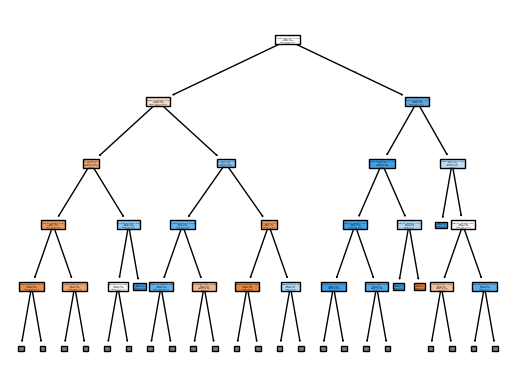

In [16]:
plot_tree(dt,feature_names=X_train.columns,class_names=['0','1'],filled=True,max_depth=4)
plt.show()

In [17]:
# True Positive
(y_test==1) & (y_pred==1)
# True negative
(y_test==0) & (y_pred==0)
# False positive
(y_test==0) & (y_pred==1)
# False Negative
(y_test==1) & (y_pred==0)

697     False
268      True
2055    False
114     False
1137    False
        ...  
1419    False
1080    False
3090    False
1045    False
2474     True
Name: churn, Length: 341, dtype: bool

In [18]:
np.sum((y_test==1) & (y_pred==1))

159

In [19]:
# True Positive
print(np.sum((y_test==1) & (y_pred==1)))
# True negative
print(np.sum((y_test==0) & (y_pred==0)))
# False positive
print(np.sum((y_test==0) & (y_pred==1)))
# False Negative
print(np.sum((y_test==1) & (y_pred==0)))

159
145
20
17


In [20]:
tp=(np.sum((y_test==1) & (y_pred==1)))
# True negative
tn=(np.sum((y_test==0) & (y_pred==0)))
# False positive
fp=(np.sum((y_test==0) & (y_pred==1)))
# False Negative
fn=(np.sum((y_test==1) & (y_pred==0)))

In [21]:
tp+tn+fp+fn

341

In [26]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

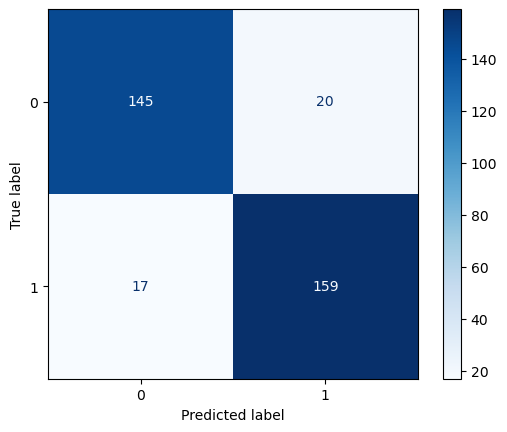

In [28]:
cox=confusion_matrix(y_test,y_pred)
display=ConfusionMatrixDisplay(cox,display_labels=[0,1])
display.plot(cmap='Blues')
plt.show()

In [30]:
#Accuracy
acc=(tp+tn)/(tp+fp+fn+tn)
# PRecission
pr=tp/(tp+fp)
#recall
recall=tp/(tp+fn)
#f1
f1=2*pr*recall/(pr+recall)


In [31]:
print(acc,pr,recall,f1)

0.8914956011730205 0.888268156424581 0.9034090909090909 0.895774647887324


In [33]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,ConfusionMatrixDisplay,roc_auc_score,roc_curve

In [35]:
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8914956011730205
0.888268156424581
0.9034090909090909
0.895774647887324
[[145  20]
 [ 17 159]]


<Axes: >

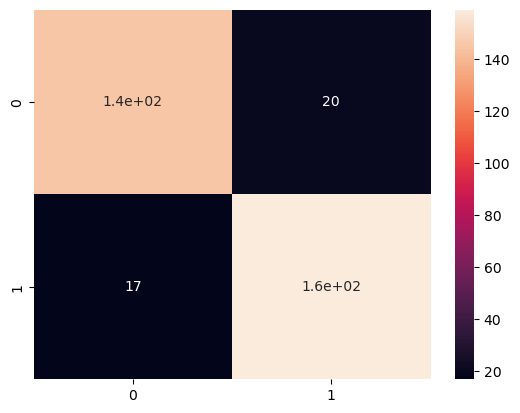

In [37]:
import seaborn as sns
sns.heatmap(cox,annot=True)

In [40]:
tn, fp, fn, tp=confusion_matrix(y_test,y_pred).flatten()
tn, fp, fn, tp

(145, 20, 17, 159)

In [41]:
tn, fp, fn, tp=confusion_matrix(y_test,y_pred,normalize='true').flatten()*100
tn, fp, fn, tp

(87.87878787878788, 12.121212121212121, 9.659090909090908, 90.3409090909091)

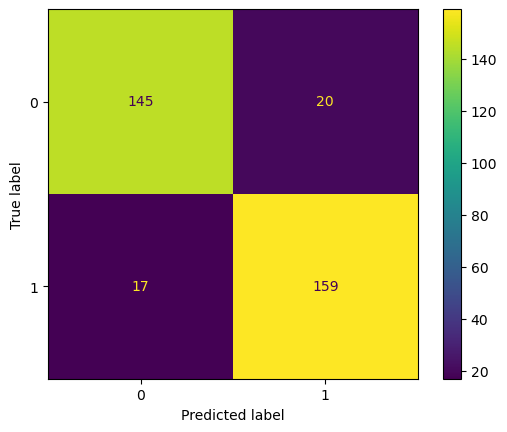

In [44]:
ConfusionMatrixDisplay(cox).plot()

In [46]:
# all together
data=pd.read_csv(r"C:\Data Sets\preprocessd_data_cleaned.csv")
X=data.drop('churn',axis=1)
y=data['churn']

## Probabilities

In [47]:
prob=dt.predict_proba(X_test)

In [48]:
pd.DataFrame(prob,columns=[0,1]).head()

,0,1
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [49]:
y_pred[:5]

array([0, 0, 1, 1, 1], dtype=int64)

In [58]:
label_1_prob=prob[:,1]# Secound column label=1
print(label_1_prob)

[0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1.
 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1.
 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1.
 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1.
 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1.
 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0.

In [60]:
roc_curve(y_test,label_1_prob)

(array([0.        , 0.12121212, 1.        ]),
 array([0.        , 0.90340909, 1.        ]),
 array([inf,  1.,  0.]))

In [59]:
fpr,tpr,threshold=roc_curve(y_test,label_1_prob)

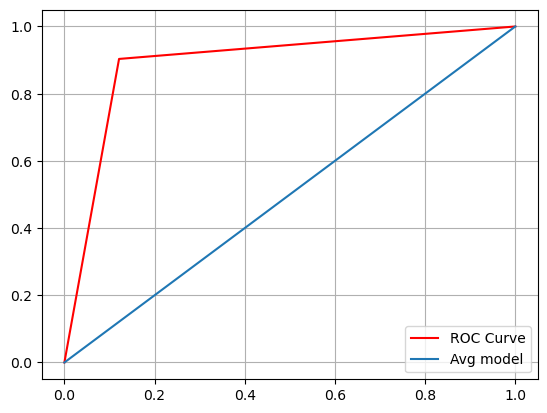

In [66]:
plt.plot(fpr,tpr,color='red',label='ROC Curve')
plt.plot([0,1],[0,1],label='Avg model')
plt.legend()
plt.grid()


In [67]:
from sklearn.metrics import auc
auc=auc(fpr,tpr)

0.8910984848484849

In [1]:
metrucs=list(zip([acc,pr,recall,f1,auc]))
id1=['Accuracy','Precision','recall','f1','auc_curve']

NameError: name 'acc' is not defined

In [73]:
pd.DataFrame(metrucs,columns=[id1])

ValueError: Shape of passed values is (5, 1), indices imply (5, 5)